In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt 
import os
import plotly.express as px

In [3]:
df = pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
df.shape

(2500, 10)

In [6]:
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [9]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format = '%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format = '%d-%m-%y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [11]:
df.columns = [i.replace(' ','_') for i in df.columns]

In [12]:
df.head()

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [13]:
df['TimeLine'] = (df['Last_Payment_Date'] - df['Join_Date']).dt.days

In [14]:
import math
df['TimeLine_Month'] = df['TimeLine'].apply(lambda x : math.ceil(x / 30))

In [15]:
df['Total_Spend'] = (df['Monthly_Revenue'] *  df['TimeLine_Month'])

In [16]:
df.head()

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration,TimeLine,TimeLine_Month,Total_Spend
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


avg spending on subs type

In [17]:
avg_spend_on_substype = df.groupby('Subscription_Type')['Total_Spend'].agg('mean').reset_index()
avg_spend_on_substype

,Subscription_Type,Total_Spend
0,Basic,133.966967
1,Premium,135.377899
2,Standard,135.457031


avg spending on subs type chart

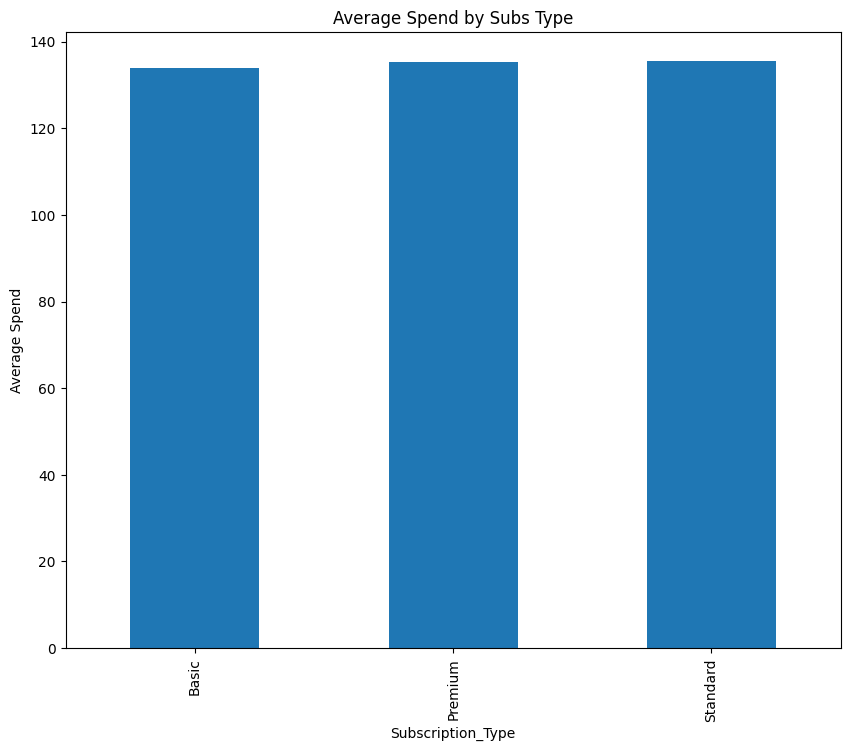

In [18]:
plt.figure(figsize=(10,8))
avg_spend_on_substype = df.groupby('Subscription_Type')['Total_Spend'].agg('mean').plot(kind='bar', 
                                                                                        title='Average Spend by Subs Type', )
plt.ylabel('Average Spend')
plt.show()

total spend by gender

In [19]:
total_spend_by_gender = df.groupby('Gender')['Total_Spend'].agg('sum').reset_index().sort_values(by = 'Total_Spend',ascending=False)
total_spend_by_gender

,Gender,Total_Spend
0,Female,168948
1,Male,168148


total spend by gender chart

<Axes: xlabel='Gender'>

<Figure size 1000x600 with 0 Axes>

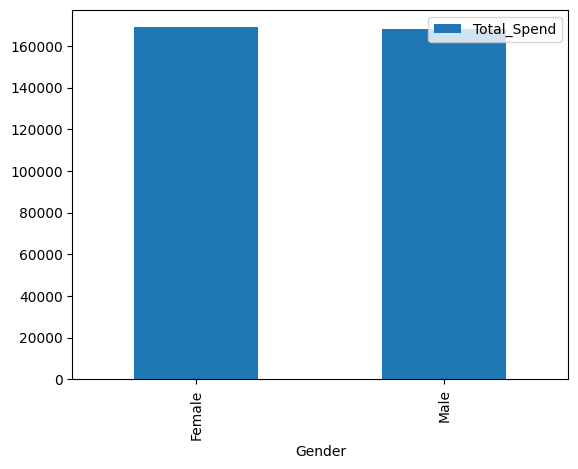

In [20]:
plt.figure(figsize=(10,6))
total_spend_by_gender.plot(kind='bar', x = 'Gender')

subs type count by country 

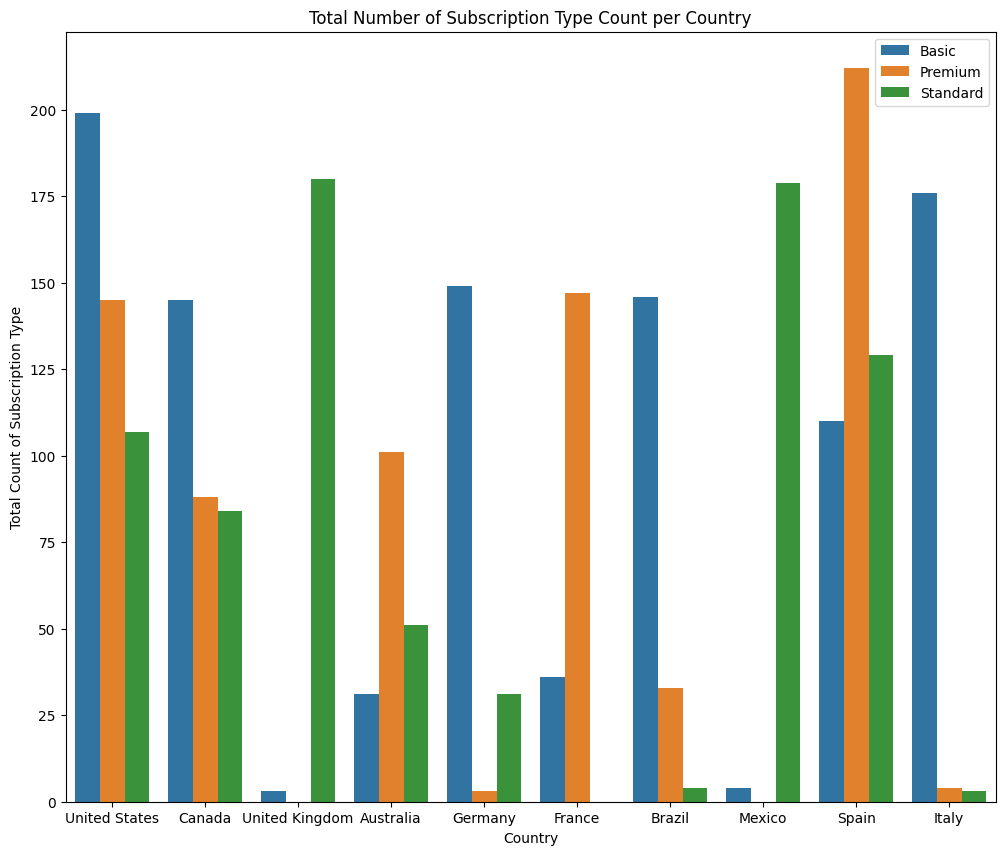

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, x = 'Country', hue = 'Subscription_Type')
plt.ylabel('Total Count of Subscription Type')
plt.title('Total Number of Subscription Type Count per Country')
plt.legend(loc='upper right')
plt.show()

total number of subs by country pivot table

In [57]:
exact_number = pd.pivot_table(
    df, 
    index='Country', 
    values='User_ID', 
    columns='Subscription_Type', 
    aggfunc='count', 
    fill_value=0
)
exact_number

exact_number['Total'] = exact_number.sum(axis=1)
exact_number

Subscription_Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


total user per country

In [22]:
user_count = df['Country'].value_counts().reset_index()
user_count.columns = ['Country','Total_User_Count']
user_count

,Country,Total_User_Count
0,United States,451
1,Spain,451
2,Canada,317
3,United Kingdom,183
4,Germany,183
5,Australia,183
6,France,183
7,Brazil,183
8,Mexico,183
9,Italy,183


total user per country world wide chart

In [130]:
plt.figure(figsize=(10,8))

fig = px.choropleth(user_count, locations='Country', locationmode='country names',hover_name="Country",color='Total_User_Count',
                    color_continuous_scale=px.colors.sequential.Plasma, title= 'Total user number by Country')

fig.update_layout(

    width = 1000,
    height = 750,
    title_font_size = 25,
    geo = dict(
        showframe = False,
        showcoastlines = False,
    )
)

fig.show() 

<Figure size 1000x800 with 0 Axes>

In [31]:
df.head()

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration,TimeLine,TimeLine_Month,Total_Spend
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


avg time line period & age by gender

In [37]:
avg_timeline_by_gender = df.groupby('Gender')[['TimeLine_Month','Age']].agg('mean').reset_index()
avg_timeline_by_gender

,Gender,TimeLine_Month,Age
0,Female,10.741448,39.077963
1,Male,10.820595,38.510056


avg time line period & age by gender chart

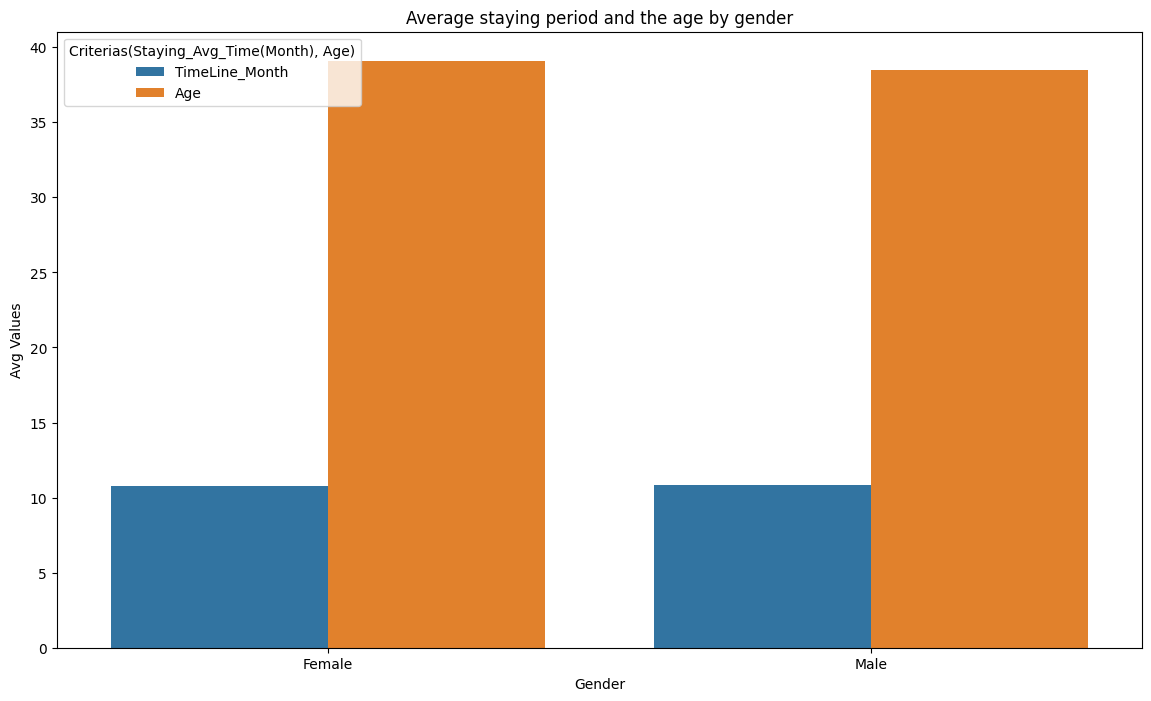

In [63]:
df_melted = avg_timeline_by_gender.melt(id_vars='Gender', 
                                        var_name='Metric', 
                                        value_name='Value')

# graph
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Gender', y='Value', hue='Metric')

plt.title('Average staying period and the age by gender')
plt.ylabel('Avg Values')
plt.xlabel('Gender')
plt.legend(title='Criterias(Staying_Avg_Time(Month), Age)', loc='upper left')
plt.show()

Achieving to the number of gender by country with two ways

first way

In [66]:
country_gender = df.groupby('Country')['Gender'].value_counts().reset_index()
country_gender

,Country,Gender,count
0,Australia,Male,94
1,Australia,Female,89
2,Brazil,Female,95
3,Brazil,Male,88
4,Canada,Male,160
5,Canada,Female,157
6,France,Male,92
7,France,Female,91
8,Germany,Female,94
9,Germany,Male,89


second way

In [73]:
pivot_country_gender = pd.pivot_table(df, index='Country',columns='Gender',values='User_ID',aggfunc='count',fill_value=0)
pivot_country_gender

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


extend the pivot table columns with adding device type in it

In [76]:
pivot_country_gender_with_device = pd.pivot_table(df, index='Country',columns=['Gender','Device'],
                                                  values='User_ID',aggfunc='count',fill_value=0)
pivot_country_gender_with_device

Gender         Female                              Male                      \
Device         Laptop Smart TV Smartphone Tablet Laptop Smart TV Smartphone   
Country                                                                       
Australia          27       13         28     21     20       25         27   
Brazil             24       15         29     27     20       25         26   
Canada             35       35         36     51     29       43         44   
France             29       25         24     13     23       18         23   
Germany            27       26         17     24     36       16         19   
Italy              20       31         20     20     30       15         27   
Mexico             22       22         21     24     22       19         25   
Spain              56       63         49     65     51       63         53   
United Kingdom     22       16         27     28     22       24         27   
United States      67       59         49     50     54       57         50   

Gender                 
Device         Tablet  
Country                
Australia          22  
Brazil             17  
Canada             44  
France             28  
Germany            18  
Italy              20  
Mexico             28  
Spain              51  
United Kingdom     17  
United States      65

In [77]:
df.head()

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration,TimeLine,TimeLine_Month,Total_Spend
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


find the avg spending amount by country and put it in a chart as well

In [86]:
avg_spend_on_country = df.groupby('Country')['Total_Spend'].agg('mean').reset_index().round(1)
avg_spend_on_country.columns=['Country','Avg_Total_Spend']
avg_spend_on_country

,Country,Avg_Total_Spend
0,Australia,136.7
1,Brazil,136.5
2,Canada,136.0
3,France,142.5
4,Germany,133.1
5,Italy,129.1
6,Mexico,132.4
7,Spain,131.4
8,United Kingdom,142.0
9,United States,134.0


In [89]:
# creating treemap
fig = px.treemap(avg_spend_on_country, path=['Country'],values='Avg_Total_Spend', title='Average Spend on Subs Type by Couny')

fig.show()

avg age amoung the countries

In [106]:
# country_avg_age = pd.pivot_table(df, index = 'Country', columns='Subscription_Type', values='Age', aggfunc='mean',fill_value=0).round(1)

country_avg_age = df.groupby('Country')['Age'].agg('mean').round(1).reset_index()
country_avg_age


,Country,Age
0,Australia,38.4
1,Brazil,38.3
2,Canada,38.7
3,France,39.1
4,Germany,39.0
5,Italy,38.6
6,Mexico,38.8
7,Spain,38.8
8,United Kingdom,39.2
9,United States,38.9


pie type

In [129]:
fig = px.pie(country_avg_age, values='Age', names='Country', 
             title='Avg Age by Countries',hole=.25)
fig.show()

bar type

In [121]:
# Bar chart
fig = px.bar(country_avg_age, x='Country', y='Age', title='Average Age by Country', 
             labels={'Age': 'Average Age', 'Country': 'Country'}, 
             text='Age')

# write the values on the top of chart
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

fig.show()

In [131]:
df.head()

,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration,TimeLine,TimeLine_Month,Total_Spend
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


check the number of device type count amoung the gender

In [148]:
device_count = df.groupby('Gender')['Device'].value_counts().reset_index()
device_count.columns=['Gender','Device Type','Number']
device_count

,Gender,Device Type,Number
0,Female,Laptop,329
1,Female,Tablet,323
2,Female,Smart TV,305
3,Female,Smartphone,300
4,Male,Smartphone,321
5,Male,Tablet,310
6,Male,Laptop,307
7,Male,Smart TV,305


graph

In [225]:
#plt.figure(figsize=(12,8))

fig = px.bar(device_count, x = 'Gender', y ='Number', color='Device Type',
             barmode='group',text='Number',title="preferred device type for that gender when connecting to the app, along with its number"
             )

# changing the graph
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count of Devices',
    legend_title='Device Type',
    template='plotly_white',  # make the theme white
    showlegend=True,
    paper_bgcolor='seashell', #background except graph
    plot_bgcolor='skyblue' ,  #graph inside background color
    legend=dict(borderwidth=5,bordercolor='slategray')
)


# position of the numbers
fig.update_traces(textposition='inside',textfont_size=15,textangle=0,cliponaxis=False)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Legend: 'barcornerradius'

Did you mean "borderwidth"?

    Valid properties:
        bgcolor
            Sets the legend background color. Defaults to
            `layout.paper_bgcolor`.
        bordercolor
            Sets the color of the border enclosing the legend.
        borderwidth
            Sets the width (in px) of the border enclosing the
            legend.
        entrywidth
            Sets the width (in px or fraction) of the legend. Use 0
            to size the entry based on the text width, when
            `entrywidthmode` is set to "pixels".
        entrywidthmode
            Determines what entrywidth means.
        font
            Sets the font used to text the legend items.
        groupclick
            Determines the behavior on legend group item click.
            "toggleitem" toggles the visibility of the individual
            item clicked on the graph. "togglegroup" toggles the
            visibility of all items in the same legendgroup as the
            item clicked on the graph.
        grouptitlefont
            Sets the font for group titles in legend. Defaults to
            `legend.font` with its size increased about 10%.
        indentation
            Sets the indentation (in px) of the legend entries.
        itemclick
            Determines the behavior on legend item click. "toggle"
            toggles the visibility of the item clicked on the
            graph. "toggleothers" makes the clicked item the sole
            visible item on the graph. False disables legend item
            click interactions.
        itemdoubleclick
            Determines the behavior on legend item double-click.
            "toggle" toggles the visibility of the item clicked on
            the graph. "toggleothers" makes the clicked item the
            sole visible item on the graph. False disables legend
            item double-click interactions.
        itemsizing
            Determines if the legend items symbols scale with their
            corresponding "trace" attributes or remain "constant"
            independent of the symbol size on the graph.
        itemwidth
            Sets the width (in px) of the legend item symbols (the
            part other than the title.text).
        orientation
            Sets the orientation of the legend.
        title
            :class:`plotly.graph_objects.layout.legend.Title`
            instance or dict with compatible properties
        tracegroupgap
            Sets the amount of vertical space (in px) between
            legend groups.
        traceorder
            Determines the order at which the legend items are
            displayed. If "normal", the items are displayed top-to-
            bottom in the same order as the input data. If
            "reversed", the items are displayed in the opposite
            order as "normal". If "grouped", the items are
            displayed in groups (when a trace `legendgroup` is
            provided). if "grouped+reversed", the items are
            displayed in the opposite order as "grouped".
        uirevision
            Controls persistence of legend-driven changes in trace
            and pie label visibility. Defaults to
            `layout.uirevision`.
        valign
            Sets the vertical alignment of the symbols with respect
            to their associated text.
        visible
            Determines whether or not this legend is visible.
        x
            Sets the x position with respect to `xref` (in
            normalized coordinates) of the legend. When `xref` is
            "paper", defaults to 1.02 for vertical legends and
            defaults to 0 for horizontal legends. When `xref` is
            "container", defaults to 1 for vertical legends and
            defaults to 0 for horizontal legends. Must be between 0
            and 1 if `xref` is "container". and between "-2" and 3
            if `xref` is "paper".
        xanchor
            Sets the legend's horizontal position anchor. This
            anchor binds the `x` position to the "left", "center"
            or "right" of the legend. Value "auto" anchors legends
            to the right for `x` values greater than or equal to
            2/3, anchors legends to the left for `x` values less
            than or equal to 1/3 and anchors legends with respect
            to their center otherwise.
        xref
            Sets the container `x` refers to. "container" spans the
            entire `width` of the plot. "paper" refers to the width
            of the plotting area only.
        y
            Sets the y position with respect to `yref` (in
            normalized coordinates) of the legend. When `yref` is
            "paper", defaults to 1 for vertical legends, defaults
            to "-0.1" for horizontal legends on graphs w/o range
            sliders and defaults to 1.1 for horizontal legends on
            graph with one or multiple range sliders. When `yref`
            is "container", defaults to 1. Must be between 0 and 1
            if `yref` is "container" and between "-2" and 3 if
            `yref` is "paper".
        yanchor
            Sets the legend's vertical position anchor This anchor
            binds the `y` position to the "top", "middle" or
            "bottom" of the legend. Value "auto" anchors legends at
            their bottom for `y` values less than or equal to 1/3,
            anchors legends to at their top for `y` values greater
            than or equal to 2/3 and anchors legends with respect
            to their middle otherwise.
        yref
            Sets the container `y` refers to. "container" spans the
            entire `height` of the plot. "paper" refers to the
            height of the plotting area only.
        
Did you mean "borderwidth"?

Bad property path:
barcornerradius
^^^^^^^^^^^^^^^